**1)Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?**

**2)n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?**

In [4]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

heartdisease_df = pd.read_csv('heart.csv')
heartdisease_df.drop([0], axis=0, inplace=True)
heartdisease_df.shape   #152 ye 151 ayrılarak hata verdiği için 0. satırı sildim.

X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [5]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [14]:
linkages = ('complete','ward','average')
for link in linkages:
    agg_küme = AgglomerativeClustering(linkage=link, 
                                      n_clusters=2)

    # Modeli Fit Etmek
    kümeler = agg_küme.fit_predict(X_std)
    print('for {}'.format(link))
    print("ARI: {} "
      .format(metrics.adjusted_rand_score(y, kümeler)))
    print("The silhoutte score: {}"
      .format(metrics.silhouette_score(X_std, kümeler, metric='euclidean')))
    print("-------------------------------------")

for complete
ARI: -0.0010498537139452934 
The silhoutte score: 0.3528075137823242
-------------------------------------
for ward
ARI: 0.29944329548761844 
The silhoutte score: 0.14371724330106123
-------------------------------------
for average
ARI: -0.0010498537139452934 
The silhoutte score: 0.3528075137823242
-------------------------------------


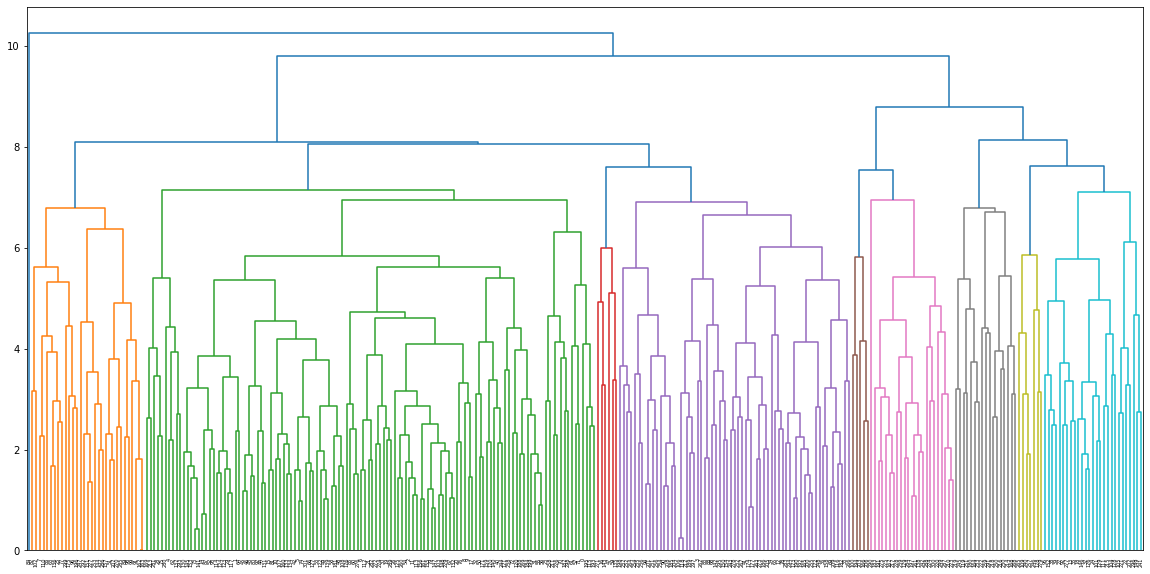

In [15]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

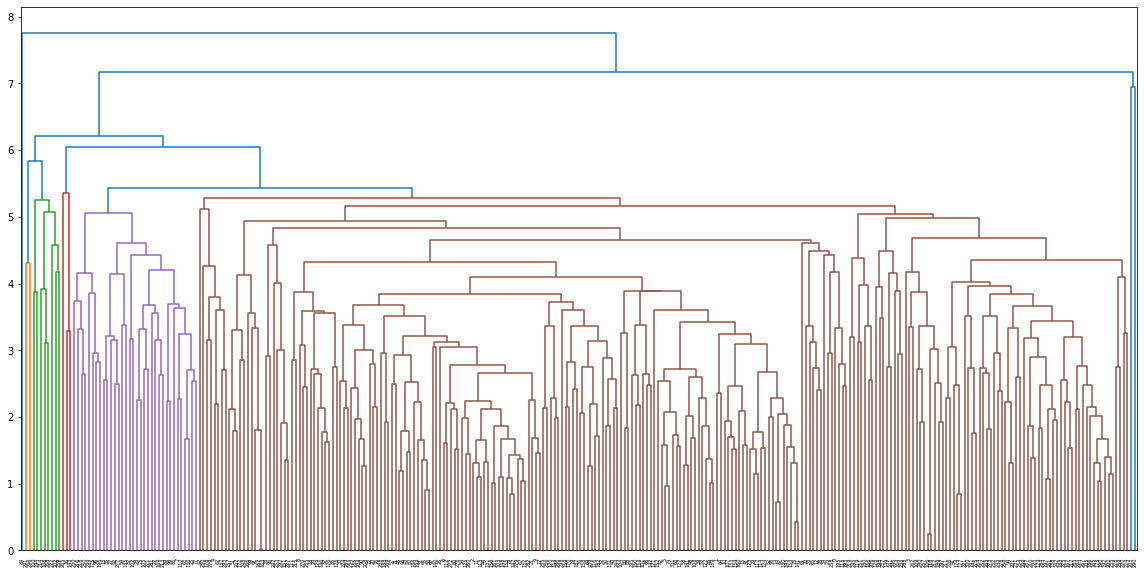

In [16]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

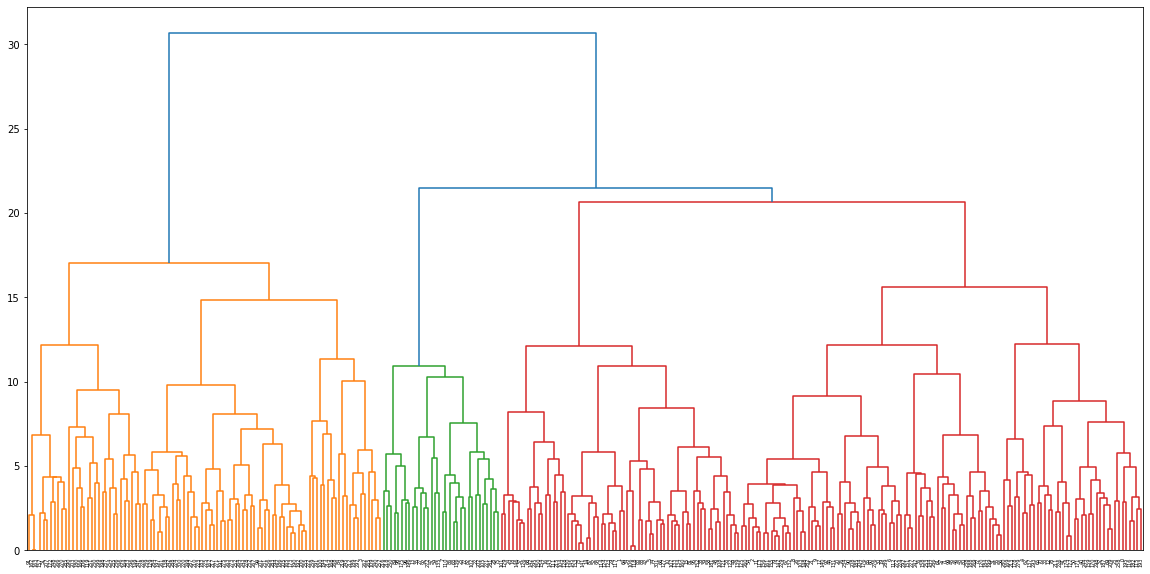

In [17]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

**Dendogramlara ve ARI sonuçlarına baktığımızda bu veri seti için ward yöntemi daha iyi çalışmaktadır diyebiliriz.Silhouette için diğer yöntemler daha iyi sonuç vermiştir.**

### Şimdi de KMeans ve Yığınsal Kümelemenin sonuçlarını ile karşılaştıralım.

### KMeans 

**ARI : 0.3852649724908098**    

**Silhouette : 0.1692112235285204**

### Yığınsal

**ARI : 0.29944329548761844**

**Silhouette :  0.14371724330106123**

**--KMeans algoritmasının daha iyi sonuç verdiği görülmektedir.**